In [51]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import binom
iterations = 10000
totalStakers = 10
pDefects = np.array([1/10000 for i in range(1,totalStakers+1)], dtype=np.float64)
stakers = np.array([i*2 for i in range(1,totalStakers+1)], dtype=np.float64)
age =  np.array([1 for i in range(1,totalStakers+1)], dtype=np.float64)
price=50

In [52]:
np.random.binomial(100,0.5)
math.log(12)


2.4849066497880004

In [53]:
def getMaturity(i):
    #if (age[i]>1):
    #return(math.log(age[i]))
    return min(math.log(age[i]+10000) - math.log(10000),0.05)
    #else:
    #    return math.log(2)
def getStake(i):
    return stakers[i]
def getWeightedMedian(values):
    values = sorted(values,key=lambda l:l[0])
    #print('values', values)
    totalWeight=0
    for i in range(len(values)):
        totalWeight+=values[i][1]
    #print('totalWeight', totalWeight)
    acc = 0
    i=0
    res=0
    while(acc<totalWeight/2):
        acc = acc + values[i][1]
        res = values[i][0]
        #print('i',i,'res',res, 'acc',acc)
        i+=1
    return res
        

In [54]:
getStake(0)

2.0

In [55]:
table = np.array([np.array([i for i in range(1,iterations+1)],dtype=np.float64)], dtype=np.float64)
prices = np.array([np.array([i for i in range(1,iterations+1)],dtype=np.float64)], dtype=np.float64)
results = np.array([i for i in range(1,iterations+1)], dtype=np.float64)

#print(table)
#for i in range(10):
 #   np.append(table, np.array([i for i in range(10)]), axis=0)
for j in range(totalStakers):
    table = np.append(table, [[0 for i in range(iterations)]], axis=0)
    prices =  np.append(prices, [[50 for i in range(iterations)]], axis=0)
    #print(table)

for i in range(1,iterations+1):
    median=0
    #total_influence=0
    #iterate through stakers to get prices
    for j in range(totalStakers):
        #print(age[j])
        reported_price = np.random.binomial(1000, 0.5)/10
        reported_price = 50
        if random.random() < pDefects[j]:
            reported_price = 100
            #reported_price = 50+abs(50-reported_price)
            #reported_price = 20
        prices[j+1][i-1] = reported_price
        influence = getMaturity(j)*getStake(j) #/14.0
        table[j+1][i-1] = influence

    array1 = np.array([[i] for i in prices[1:,i-1]])
    array2 = np.array([[i] for i in table[1:,i-1]])
    results[i-1]=getWeightedMedian(np.hstack((array1, array2)))
    #iterate through stakers and apply penalty
    for j in range(totalStakers):
        if(results[i-1]**2>0):
            penalty = (results[i-1]-prices[j+1][i-1])**2/results[i-1]**2
            if(penalty>1):
                penalty=1
        else:
            penalty=1
        #print(penalty)
        #print(prices[j+1][i-1],penalty)
        #penalty=1
        #print(results[i-1],prices[j+1][i-1],penalty,age[j])
        #age[j] = np.exp(getMaturity(j)*(1-penalty))
        #print(age[j])
        #influence = getMaturity()*getStake(j)
#         if(penalty==0):
        age[j] = age[j] + 1.0 - age[j]*penalty
        influence = getMaturity(j)*getStake(j) #/14.0
        table[j+1][i-1] = influence
#     print(table)
#     print(pr 
    

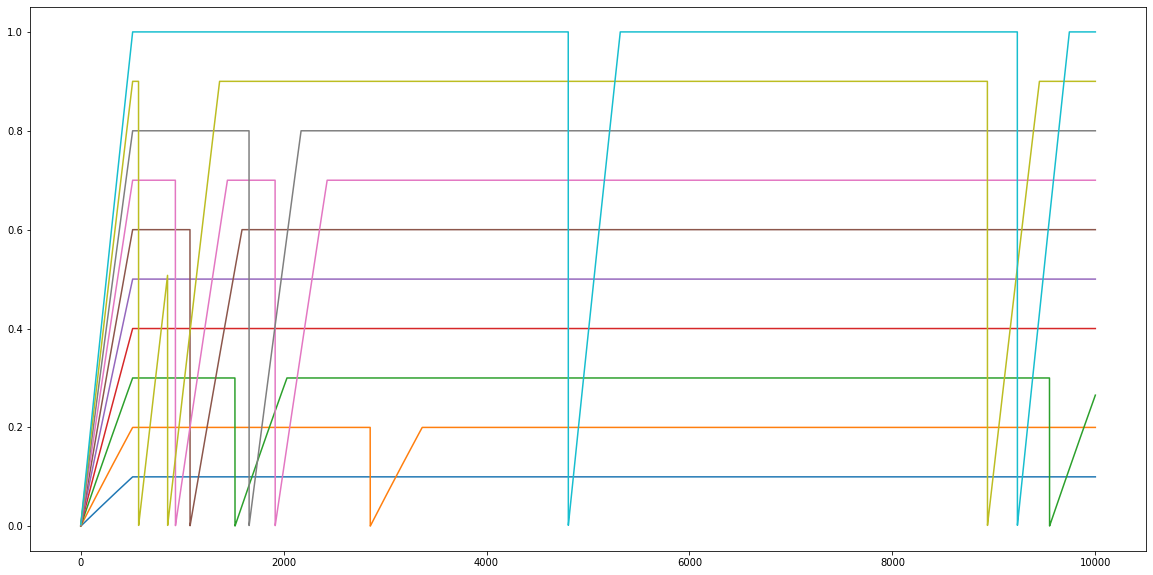

In [56]:
plt.figure(figsize=(20,10))
for i in range(1,totalStakers+1):
    plt.plot(table[0], table[i])

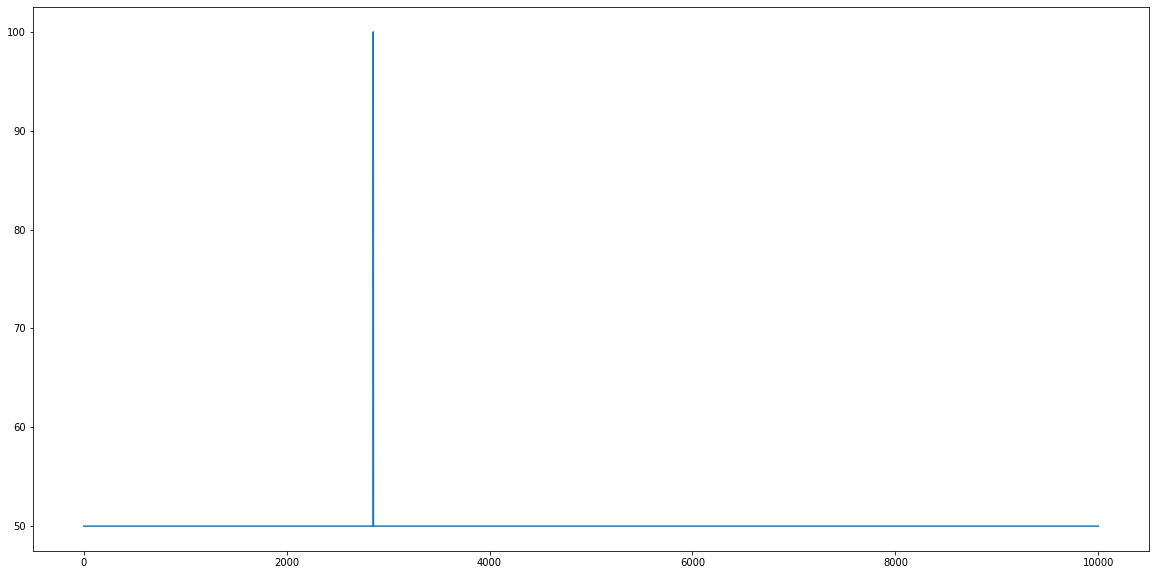

In [57]:
plt.figure(figsize=(20,10))
plt.plot(prices[0], prices[2])

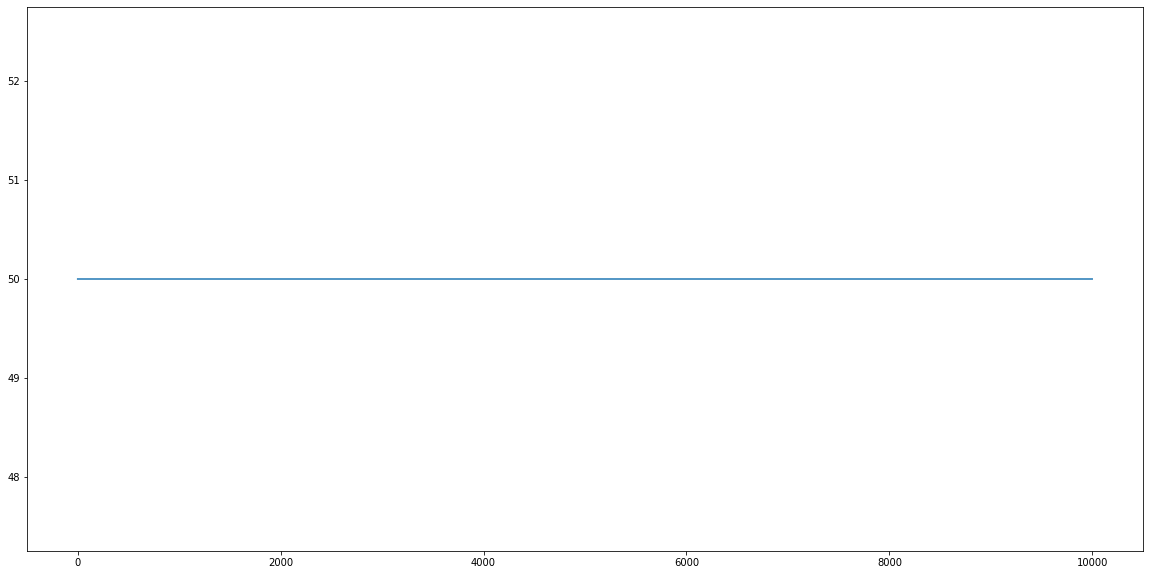

In [58]:
plt.figure(figsize=(20,10))
plt.plot(results)

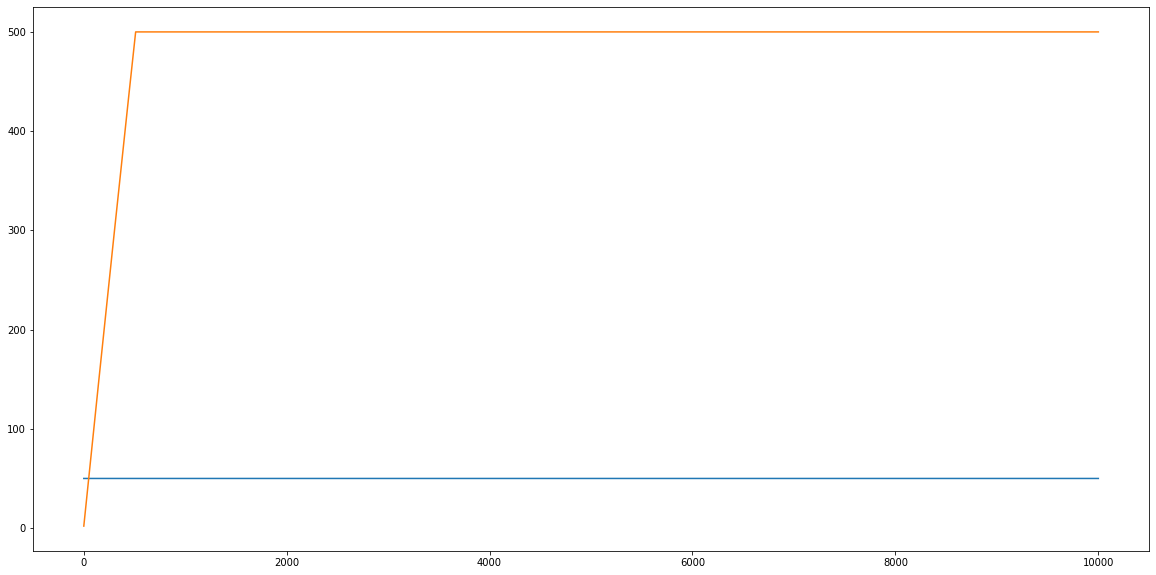

In [59]:
plt.figure(figsize=(20,10))
plt.plot(prices[0], prices[5])
# plt.plot(results)
plt.plot(table[0], table[5]*1000)


In [60]:
percentage = np.array([np.array([i for i in range(1,totalStakers+1)],dtype=np.float64)], dtype=np.float64)
print(len(table[1]))
for i in range(1,len(table[1])):
    total=0
    for j in range(1,totalStakers+1):
        #print(i,j)
        total += table[j][i]
    #print(total)
    #print([[table[i][j]*100/total for j in range(1,11)]])
    percentage = np.append(percentage, [[(table[j][i]*100)/total for j in range(1,totalStakers+1)]], axis=0)
    #print(percentage)
    #print(table[0:2])
#print(percentage)

10000


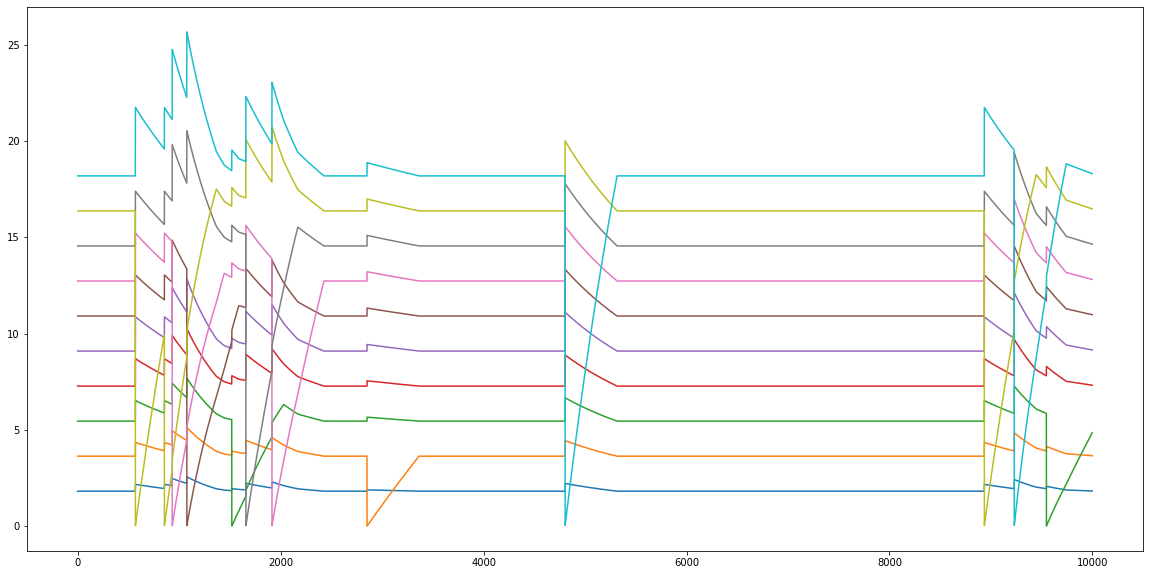

In [61]:
plt.figure(figsize=(20,10))
plt.plot(percentage[1:])
#plt.plot(percentage[1], percentage[1])
# for i in range(1,2):
#     plt.plot(i, percentage[i])
